# Goal

Goal is to find a mechanism to search for under-valued stock to invest in.

Need to find indicators for good stock by examining historical data.

In [1]:
import pandas as pd
from tqdm import tqdm

from concurrent.futures import ThreadPoolExecutor
import yfinance as yf
from pprint import pprint
from time import monotonic

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'tqdm'

In [2]:
# Getting list of stonks which are available on trade-212. CSV sourced from reddit.
stonks = pd.read_csv('Trading212-INVEST.csv')['ticker'].values.tolist()
len(stonks)

5196

In [3]:
def get_ticker(index):
    
    try:  
        ticker = yf.Ticker(index)

        info = ticker.get_info()

        if ticker.get_info()['regularMarketPrice'] is None:
            return None

        ticker_history = ticker.history(period='max')

        if len(ticker_history)==0:
            return None

        financials = ticker.financials.T
        balance_sheet = ticker.balance_sheet.T

        # Converting pandas dataframes to dicts as it seems to save in the pickle file better.
        data_dict = {f'{index}':{
                     'info':info,
                     'history':ticker_history.to_dict(),
                     'financials':financials.to_dict(),
                     'balance_sheet':balance_sheet.to_dict()}
                    }
        return data_dict
    except:
        data_dict = {f'{index}':'error'}
        return data_dict

In [4]:
tickers = list()
count=0
for stonk in stonks:
    count+=1
    tickers.append(get_ticker(stonk))
    print(f'Count: {count}',end='\r')

- GOOS : No data found, symbol may be delisted
- HEP: CircuitBreaker 'redis' is OPEN and does not permit further calls
- IPU: 1d data not available for startTime=-2208988800 and endTime=1630973396. Only 100 years worth of day granularity data are allowed to be fetched per request.
- LKOR : No data found, symbol may be delisted
- PJS1: 1d data not available for startTime=-2208988800 and endTime=1630976400. Only 100 years worth of day granularity data are allowed to be fetched per request.
- SPY4: 1d data not available for startTime=-2208988800 and endTime=1630978244. Only 100 years worth of day granularity data are allowed to be fetched per request.
- SPY4: 1d data not available for startTime=-2208988800 and endTime=1630978249. Only 100 years worth of day granularity data are allowed to be fetched per request.
- SPYM: 1d data not available for startTime=-2208988800 and endTime=1630978255. Only 100 years worth of day granularity data are allowed to be fetched per request.
- SPYW: 1d data

- VDEV: 1d data not available for startTime=-2208988800 and endTime=1630994326. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VDNR: 1d data not available for startTime=-2208988800 and endTime=1630994332. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VDTY: 1d data not available for startTime=-2208988800 and endTime=1630994337. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VECP: 1d data not available for startTime=-2208988800 and endTime=1630994367. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VECP: 1d data not available for startTime=-2208988800 and endTime=1630994372. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VETY: 1d data not available for startTime=-2208988800 and endTime=1630994413. Only 100 years worth of day granularity data are allowed to be fetched per request.
- VEVE: 1d data 

In [7]:
import pickle
def savefile(fname,obj):
    with open(fname,'wb') as file:
        pickle.dump(obj,file)
        
savefile("C:\\Users\\cemly\\Documents\\stocks\\ticker_files.pkl",tickers)

In [2]:
import pickle
import os

import os.path

def save_file(fname):
    with open(fname,'wb') as file:
        pickle.dump(tickers,file)

def save_tickers(filepath,filename,overwrite=False):
    
    fname = os.path.join(filepath,filename)
    
    # check if files exists
    if os.path.isfile(fname):
        if overwrite:
            print(f'File {fname} already exists')
            return None
        else:
            save_file(fname)
    else:
        save_file(fname)
        
save_tickers("C:\\Users\\cemly\\Documents\\stocks","ticker_files.pkl")

NameError: name 'tickers' is not defined

In [ ]:
import pickle

def savefile(fname,obj):
    with open(fname,'wb') as file:
        pickle.dump(obj,file)

def loadfile(fname):
    with open(fname,'rb') as file:
        data = pickle.load(file)
    return data
        
tickers = loadfile("C:\\Users\\cemly\\Documents\\stocks\\ticker_files_24012022.pkl")

In [ ]:
len(tickers)

In [5]:
nones = list()
for ticker in tickers:
    if ticker is None:
        nones.append(1)
    else:
        nones.append(0)
        
sum(nones)/len(tickers)

0.42051578137028484

In [6]:
data_dict = dict()
for val in tqdm(tickers):
    if val is not None:
        data_dict.update(val)

100%|███████████████████████████████████████████████████████████████████████████| 5196/5196 [00:00<00:00, 11100.12it/s]


In [7]:
data_dict.keys()

dict_keys(['A', 'AA', 'AAL', 'AAN', 'AAOI', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABCB', 'ABMD', 'ABT', 'AC', 'ACA', 'ACAD', 'ACB', 'ACCO', 'ACGL', 'ACHC', 'ACIW', 'ACLS', 'ACM', 'ACN', 'ACOR', 'ADBE', 'ADC', 'ADES', 'ADI', 'ADM', 'ADNT', 'ADP', 'ADPT', 'ADS', 'ADSK', 'ADUS', 'ADV', 'AEE', 'AEIS', 'AEM', 'AEP', 'AER', 'AERI', 'AES', 'AFL', 'AG', 'AGIO', 'AGNC', 'AGR', 'AGRX', 'AGT', 'AGX', 'AGYS', 'AHT', 'AI', 'AIG', 'AIR', 'AIRG', 'AIV', 'AIZ', 'AJX', 'AKAM', 'AL', 'ALB', 'ALC', 'ALE', 'ALEC', 'ALEX', 'ALG', 'ALGN', 'ALL', 'ALLE', 'ALLK', 'ALLO', 'ALRM', 'ALV', 'ALXN', 'AMAT', 'AMBA', 'AMC', 'AMD', 'AME', 'AMED', 'AMG', 'AMGN', 'AMKR', 'AMLP', 'AMN', 'AMP', 'AMRC', 'AMRN', 'AMRX', 'AMS', 'AMSWA', 'AMT', 'AMZN', 'AN', 'ANET', 'ANF', 'ANIK', 'ANPC', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APAM', 'APD', 'APH', 'APPF', 'APPN', 'APPS', 'APRN', 'APTV', 'ARB', 'ARC', 'ARCH', 'ARCO', 'ARI', 'ARL', 'ARLO', 'ARLP', 'ARNA', 'AROC', 'ARW', 'ASB', 'ASC', 'ASGN', 'ASIX', 'ASM', 'ASML', 'ASUR', 'ASYS', 'ATC'

In [30]:
import numpy as np

history = pd.DataFrame.from_dict(tickers[-2]['ZTS']['history'])

# fetch the date nearest to the given date
given_date = pd.Timestamp('2019-01-01')
history['distance'] = np.abs((history.index - given_date))
history.loc[history.distance==history.distance.min()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,distance
2018-12-31,83.885761,84.200566,83.226640,84.151382,1485200,0.0,0,1 days
2019-01-02,83.138116,83.698863,82.390452,83.108604,2665600,0.0,0,1 days


In [121]:
def process_ticker(index,ticker,date):
    ticker_history = pd.DataFrame.from_dict(ticker['history'])
    financials = pd.DataFrame.from_dict(ticker['financials'])
    balance_sheet = pd.DataFrame.from_dict(ticker['balance_sheet'])
    
    # Get the latest date available in the ticker history
    ticker_history['distance'] = np.abs((ticker_history.index - given_date))
    
    # Getting the date and value at the prescribed date
    nearest_history = history.loc[history.distance==history.distance.min()]
    
    if len(nearest_history)>1:
        nearest_history = nearest_history.iloc[[-1]]
    elif len(nearest_history)<=0:
        return None
    
    reference_date = nearest_history.index[-1]
    reference_price = nearest_history['Close'][-1]
    
    today_tm88 = reference_date - pd.Timedelta('88days')
    today_tm92 = reference_date - pd.Timedelta('92days')

    # Get the price 3 months ago
    ticker_history_tm90 = ticker_history[(ticker_history.index>=today_tm92)&\
                                         (ticker_history.index<=today_tm88)]

    len_history = len(ticker_history_tm90)

    if len_history==0:
        return None
    elif len(ticker_history_tm90)==3:
        ticker_history_tm90 = ticker_history_tm90.iloc[[2]]
    elif len(ticker_history_tm90)<3:
        ticker_history_tm90 = ticker_history_tm90.iloc[[-1]]

    tm90_price = ticker_history_tm90['Close'].iloc[-1]
    tm90_price_date = ticker_history_tm90['Close'].index[-1]

    growth = (reference_price-tm90_price)/tm90_price

    
    '''
    Getting the financials.
    '''

    # figuring out how often the financials are
    #import numpy as np
    if len(financials)>1:
        frequency = financials.index.to_frame().diff()[1:].values/np.timedelta64(1, 'D')
        frequency = np.round(frequency/30,30).astype(int)
        frequency = np.unique(frequency)

        if -frequency[0]<=2:
            freq = 29
        elif -frequency[0]<=4:
            freq = 87
        elif -frequency[0]<7:
            freq = 175
        else:
            freq = 350

        freq_earliest = reference_date - pd.Timedelta(f'{freq}days')
        freq_latest = reference_date + pd.Timedelta(f'{freq}days')
        financials = financials[(financials.index>=freq_earliest)&(financials.index<=freq_latest)]

        if len(financials)>1:
            financials = financials.iloc[[-1]]
    
    
    '''
    Getting the balance sheet.
    '''

    if len(balance_sheet)>1:
        frequency = balance_sheet.index.to_frame().diff()[1:].values/np.timedelta64(1, 'D')
        frequency = np.round(frequency/30,30).astype(int)
        frequency = np.unique(frequency)

        if -frequency[0]<=2:
            freq = 29
        elif -frequency[0]<=4:
            freq = 87
        elif -frequency[0]<7:
            freq = 175
        else:
            freq = 350         

        freq_earliest = reference_date - pd.Timedelta(f'{freq}days')
        freq_latest = reference_date + pd.Timedelta(f'{freq}days')
        balance_sheet = balance_sheet[(balance_sheet.index>=freq_earliest)&(balance_sheet.index<=freq_latest)]

        if len(balance_sheet)>1:
            balance_sheet = balance_sheet.iloc[[-1]]
        
        financials['growth'] = growth
        financials['latest_price'] = reference_price
        financials['tm90_price'] = tm90_price
        financials['latest_price_date'] = reference_date
        financials['tm90_price_date'] = tm90_price_date
        financials['stonk'] = index
        financials = financials.reset_index(drop=True)
        balance_sheet = balance_sheet.reset_index(drop=True)
        
        balance_cols = balance_sheet.columns.tolist()
        financial_cols = financials.columns.tolist()
        overlap = dict([(x,x+'_balance_sheet') for x in financial_cols if x in balance_cols])
        balance_sheet = balance_sheet.rename(columns=overlap)
        
        return pd.concat([financials,balance_sheet],axis=1)

In [122]:
process_list = list()
funny_list = list()
for k,v in tqdm(data_dict.items()):
    
    if isinstance(v,dict):
        process_list.append(process_ticker(k,v,'2019-10-01'))
    else:
        funny_list.append(k)

100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [01:43<00:00, 13.88it/s]


In [123]:
df = pd.concat(process_list,axis=0)

In [124]:
df.head()

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Minority Interest_balance_sheet,Short Long Term Debt,Short Term Investments,Deferred Long Term Liab
0,3.87e+08,None,9.460000e+08,4e+06,3.160000e+08,1.322e+09,2.680000e+09,9.710000e+08,9.710000e+08,None,...,6.800000e+07,1.103000e+09,8.350000e+08,1.799000e+09,6.380000e+08,3.400000e+08,4.000000e+06,NaN,NaN,NaN
0,3.1e+07,None,1.625000e+09,1.97e+09,2.500000e+08,3.87e+08,3.353000e+09,2.077000e+09,2.077000e+09,1.25e+08,...,1.360000e+09,5.410000e+09,1.003000e+09,1.801000e+09,1.819000e+09,1.663000e+09,1.970000e+09,1.000000e+06,NaN,NaN
0,None,None,1.884000e+09,None,1.412000e+09,1.52e+09,1.220400e+10,3.757000e+09,3.757000e+09,5.088e+09,...,1.890000e+08,-6.397000e+09,1.706000e+09,2.056600e+10,1.522000e+09,1.773000e+09,NaN,3.213000e+09,4.485000e+09,NaN
0,4.9903e+07,None,-9.778000e+06,None,-2.146000e+06,4.8638e+07,8.777300e+07,-1.076800e+07,-1.076800e+07,None,...,NaN,3.193030e+08,3.053400e+07,6.032800e+07,9.325600e+07,2.991000e+07,NaN,2.358900e+07,NaN,NaN
0,None,None,5.552640e+08,None,4.238470e+08,3.60174e+09,4.219413e+09,6.176750e+08,6.176750e+08,None,...,NaN,2.009983e+09,6.249720e+08,1.045720e+09,4.362547e+09,3.172790e+09,NaN,2.100000e+05,NaN,NaN


<AxesSubplot:>

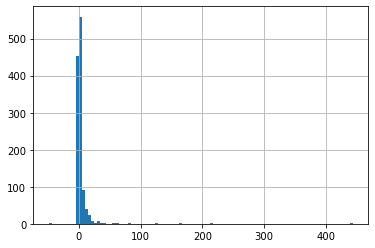

In [125]:
df.growth.hist(bins=100)

In [126]:
df.shape

(1201, 57)

In [127]:
df['growth'].describe(np.arange(0,1,0.1))

count    1201.000000
mean        3.764349
std        16.632939
min       -48.766583
0%        -48.766583
10%        -0.402901
20%        -0.108827
30%         0.175421
40%         0.542762
50%         0.979382
60%         1.562709
70%         2.515634
80%         4.361845
90%         7.879125
max       443.431024
Name: growth, dtype: float64

In [128]:
df = df[(df.growth>-0.6)&(df.growth<0.6)].fillna(0)

In [129]:
df.corr()['growth'].sort_values()

tm90_price                               -0.941899
Good Will                                -0.092621
Research Development                     -0.080566
Capital Surplus                          -0.059614
Common Stock                             -0.049248
Other Current Assets                     -0.045371
Minority Interest                        -0.044694
Minority Interest_balance_sheet          -0.044589
Intangible Assets                        -0.044584
Cash                                     -0.044038
Income Tax Expense                       -0.042733
Operating Income                         -0.042265
Gross Profit                             -0.042237
Ebit                                     -0.042094
Net Income Applicable To Common Shares   -0.041883
Net Income                               -0.041879
Income Before Tax                        -0.041737
Net Income From Continuing Ops           -0.041536
Selling General Administrative           -0.041243
Total Stockholder Equity       

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

reg_rf = RandomForestRegressor(min_samples_split=130,max_depth=8)

df_rf = df.copy()
X,y = df_rf.select_dtypes('number').drop(columns=['growth',
                                               'latest_price',
                                               'tm90_price']).values,df_rf['growth'].dropna().values
X_cols = df_rf.select_dtypes('number').drop(columns=['growth',
                                               'latest_price',
                                               'tm90_price']).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4221)

reg_rf.fit(X_train,y_train)

train_mse = mean_squared_error(reg_rf.predict(X_train),y_train)
test_mse = mean_squared_error(reg_rf.predict(X_test),y_test)

print(f'Train MSE:{train_mse:0.5} Test MSE:{test_mse:0.5}')

Train MSE:0.090996 Test MSE:0.11597


In [131]:
pd.DataFrame(reg_rf.feature_importances_,index=X_cols,columns=['FI']).sort_values(by=['FI'],ascending=False)

,FI
Good Will,0.247645
Other Stockholder Equity,0.095291
Net Tangible Assets,0.089297
Accounts Payable,0.062242
Selling General Administrative,0.055734
Total Current Assets,0.051596
Treasury Stock,0.039480
Retained Earnings,0.032553
Gross Profit,0.030471
Other Current Assets,0.029804


<AxesSubplot:xlabel='growth', ylabel='predicted_growth'>

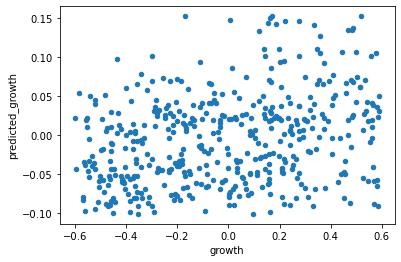

In [132]:
df_rf['predicted_growth'] = reg_rf.predict(X)
df_rf[['predicted_growth','growth']].plot.scatter(x='growth',y='predicted_growth')

In [133]:
df_rf['investment'] = np.where(df_rf['predicted_growth']>0.01,100,0)
df_rf['profit'] = (df_rf['growth'])*df_rf['investment']

roi = df_rf['profit'].sum()/df_rf['investment'].sum()
profit = df_rf['profit'].sum()

print(f'Profit:{profit:0.2f} Return of Investment:{roi:0.2%}')

Profit:1614.75 Return of Investment:8.87%


<AxesSubplot:>

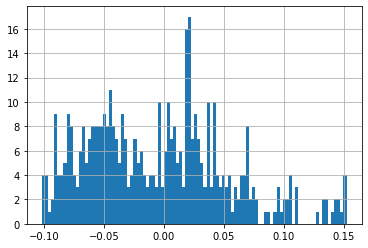

In [163]:
df_rf['predicted_growth'].hist(bins=100)

In [243]:
def calc_roi(df_rf,cutoff):
    df_rf['investment'] = np.where(df_rf['predicted_growth']>=cutoff,10*np.power((1+df_rf['predicted_growth']),5),0)
    df_rf['investment'] = np.abs(df_rf['investment'])
    df_rf['profit'] = (df_rf['growth'])*df_rf['investment']

    roi = df_rf['profit'].sum()/df_rf['investment'].sum()
    profit = df_rf['profit'].sum()
    n = df_rf[df_rf['investment']>0].shape[0]
    inv = df_rf['investment'].sum()
    
    return roi,profit,n,inv

l = [calc_roi(df_rf,x) for x in np.arange(-0.1,0.1,0.01)]

<AxesSubplot:xlabel='predicted_growth', ylabel='investment'>

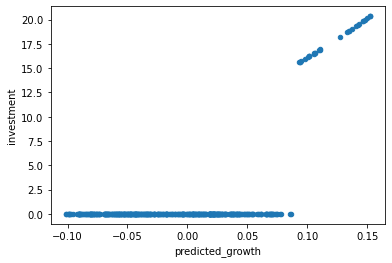

In [244]:
df_rf.plot.scatter(x='predicted_growth',y='investment')

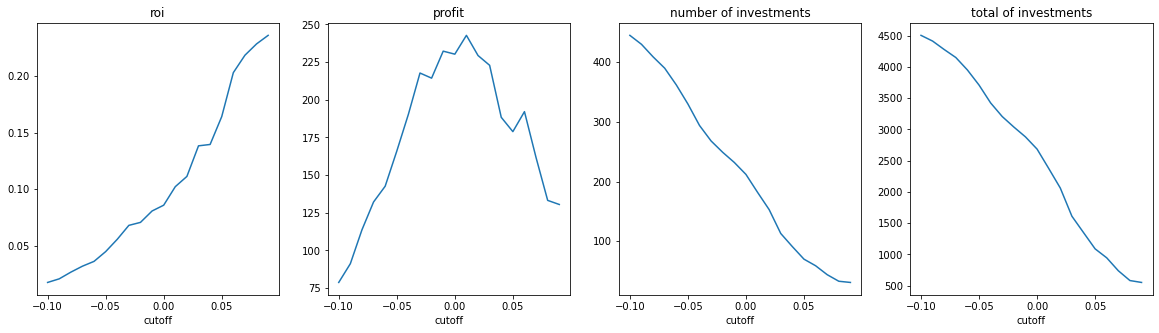

In [245]:
fig,axes = plt.subplots(1,4,figsize=[20,5])

axes[0].plot(np.arange(-0.1,0.1,0.01),[y[0] for y in l])
axes[0].set_title('roi')
axes[0].set_xlabel('cutoff')

axes[1].plot(np.arange(-0.1,0.1,0.01),[y[1] for y in l])
axes[1].set_title('profit')
axes[1].set_xlabel('cutoff')

axes[2].plot(np.arange(-0.1,0.1,0.01),[y[2] for y in l])
axes[2].set_title('number of investments')
axes[2].set_xlabel('cutoff')

axes[3].plot(np.arange(-0.1,0.1,0.01),[y[3] for y in l])
axes[3].set_title('total of investments')
axes[3].set_xlabel('cutoff')
plt.show()

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.linear_model import Ridge,Lasso

reg = Ridge(alpha=10**2)
#reg = Lasso(alpha=0.5)

df_rig = df.copy()
X,y = df_rig[~df_rig['growth'].isna()].select_dtypes('number').drop(columns=['growth',
                                               'latest_price',
                                               'tm90_price']).values,df_rig['growth'].dropna().values
X_cols = df_rig[~df_rig['growth'].isna()].select_dtypes('number').drop(columns=['growth',
                                               'latest_price',
                                               'tm90_price']).columns
X = normalize(X,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4221)

reg.fit(X_train,y_train)

train_mse = mean_squared_error(reg.predict(X_train),y_train)
test_mse = mean_squared_error(reg.predict(X_test),y_test)

print(f'Train Shape{X_train.shape} Test shape:{X_test.shape}' )
print(f'Train MSE:{train_mse:0.4f} Test MSE:{test_mse:0.4f}')

Train Shape(299, 51) Test shape:(148, 51)
Train MSE:0.1019 Test MSE:0.1148


In [249]:
pd.DataFrame(np.abs(reg.coef_),index=X_cols,columns=['FI reg']).sort_values(by=['FI reg'],ascending=False)

,FI reg
Retained Earnings,0.021974
Treasury Stock,0.017612
Property Plant Equipment,0.014680
Good Will,0.011019
Net Tangible Assets,0.010886
Total Current Assets,0.010450
Other Assets,0.009173
Income Before Tax,0.006376
Accounts Payable,0.005904
Gross Profit,0.005731


In [256]:
pd.DataFrame(reg.coef_,index=X_cols,columns=['FI reg']).sort_values(by=['FI reg'],ascending=False)

,FI reg
Treasury Stock,0.017612
Property Plant Equipment,0.014680
Net Tangible Assets,0.010886
Other Assets,0.009173
Accounts Payable,0.005904
Total Liab,0.004391
Long Term Investments,0.002987
Cost Of Revenue,0.002907
Total Operating Expenses,0.002698
Total Assets,0.002543


<AxesSubplot:xlabel='growth', ylabel='predicted_growth'>

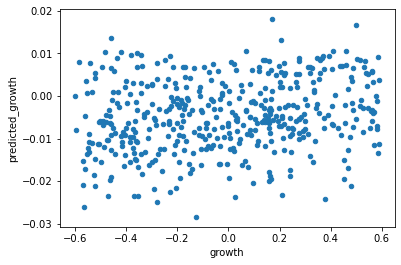

In [250]:
df_rig['predicted_growth'] = reg.predict(X)
df_rig[['predicted_growth','growth']].plot.scatter(x='growth',y='predicted_growth')

In [251]:
df_rig['investment'] = np.where(df_rig['predicted_growth']>0.01,100,0)
df_rig['profit'] = (df_rig['growth'])*df_rig['investment']
df_rig['roi'] = df_rig['profit']/df_rig['investment']

roi = df_rig['profit'].sum()/df_rig['investment'].sum()
profit = df_rig['profit'].sum()

print(f'Profit:{profit:0.2f} Return of Investment:{roi:0.2%}')

Profit:9.05 Return of Investment:0.90%


<AxesSubplot:>

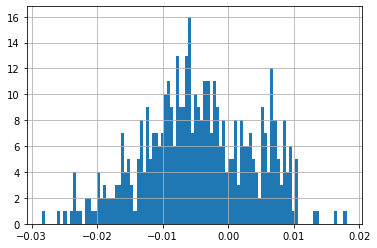

In [252]:
df_rig['predicted_growth'].hist(bins=100)

In [253]:
df_rig[df_rig['profit']==0]

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Inventory,Accounts Payable,Minority Interest_balance_sheet,Short Long Term Debt,Short Term Investments,Deferred Long Term Liab,predicted_growth,investment,profit,roi
0,3.870000e+08,0,9.460000e+08,4000000.0,3.160000e+08,1.322000e+09,2.680000e+09,9.710000e+08,9.710000e+08,0.0,...,6.380000e+08,3.400000e+08,4000000.0,0.000000e+00,0.000000e+00,0.0,-0.004680,0,0.0,NaN
0,0.000000e+00,0,5.552640e+08,0.0,4.238470e+08,3.601738e+09,4.219413e+09,6.176750e+08,6.176750e+08,0.0,...,4.362547e+09,3.172790e+09,0.0,2.100000e+05,0.000000e+00,0.0,-0.005887,0,-0.0,NaN
0,1.423600e+10,0,7.290300e+10,0.0,5.953100e+10,1.670500e+10,1.018390e+11,7.089800e+10,7.089800e+10,0.0,...,3.956000e+09,5.588800e+10,0.0,8.784000e+09,4.038800e+10,0.0,-0.002890,0,0.0,NaN
0,5.259000e+09,0,5.197000e+09,21000000.0,5.687000e+09,7.353000e+09,2.503500e+10,1.192300e+10,1.192300e+10,500000000.0,...,1.605000e+09,1.546000e+09,0.0,1.609000e+09,7.720000e+08,0.0,-0.011077,0,0.0,NaN
0,0.000000e+00,0,1.177423e+09,117137000.0,1.658405e+09,2.460301e+09,4.576379e+09,1.650951e+09,1.650951e+09,0.0,...,1.191851e+10,2.683687e+10,117137000.0,1.516570e+08,0.000000e+00,0.0,-0.000689,0,-0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000e+00,0,1.839000e+09,0.0,1.542000e+09,9.010000e+08,2.664000e+09,1.763000e+09,1.763000e+09,7000000.0,...,0.000000e+00,2.020000e+08,0.0,3.110000e+08,0.000000e+00,0.0,0.002960,0,-0.0,NaN
0,3.917000e+08,0,-2.711000e+08,4800000.0,-3.792000e+08,3.372400e+09,5.661000e+09,1.301000e+09,1.301000e+09,0.0,...,2.256500e+09,3.626000e+08,4800000.0,5.250000e+08,0.000000e+00,0.0,-0.013529,0,-0.0,NaN
0,4.440000e+08,0,5.240000e+08,0.0,4.210000e+08,7.980000e+08,1.981000e+09,6.420000e+08,6.420000e+08,0.0,...,5.200000e+08,5.520000e+08,0.0,1.570000e+08,0.000000e+00,15000000.0,-0.011898,0,-0.0,NaN
0,1.602600e+08,0,-1.431910e+08,0.0,-1.310840e+08,3.951590e+08,4.174910e+08,-1.379280e+08,-1.379280e+08,9567000.0,...,0.000000e+00,1.682000e+07,0.0,0.000000e+00,3.002130e+08,26914000.0,0.005286,0,0.0,NaN


In [254]:
def calc_roi(df_rf,cutoff):
    df_rf['investment'] = np.where(df_rf['predicted_growth']>cutoff,1,0)
    df_rf['profit'] = (df_rf['growth'])*df_rf['investment']

    roi = df_rf['profit'].sum()/df_rf['investment'].sum()
    profit = df_rf['profit'].sum()
    n = df_rf[df_rf['investment']>0].shape[0]
    inv = df_rf['investment'].sum()
    
    return roi,profit,n,inv

range_ = np.arange(df_rig['predicted_growth'].min(),
                                           df_rig['predicted_growth'].max(),0.01)

l = [calc_roi(df_rig,x) for x in range_]
l

[(-0.01274408542279204, -5.68386209856525, 446, 446),
 (-0.0060989865673779205, -2.5676733448661047, 421, 421),
 (0.037845082908638875, 11.429215038408941, 302, 302),
 (0.06889268637298027, 7.99155161926571, 116, 116),
 (0.10368745000427833, 0.4147498000171133, 4, 4)]

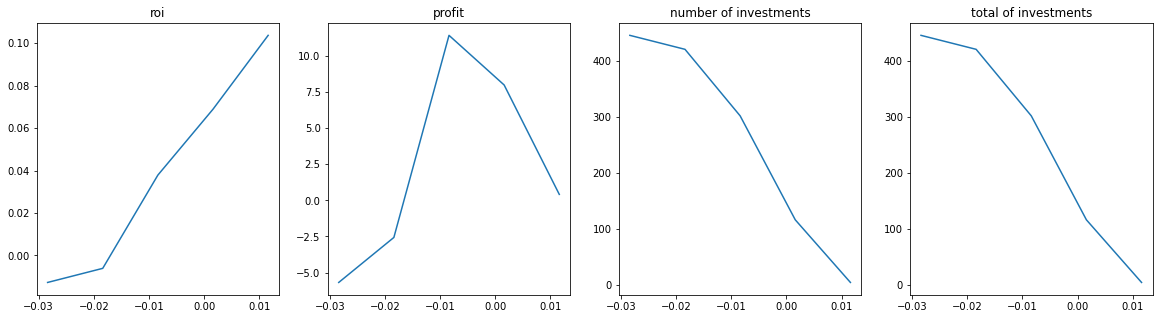

In [255]:
fig,axes = plt.subplots(1,4,figsize=[20,5])

axes[0].plot(range_,[y[0] for y in l])
axes[0].set_title('roi')

axes[1].plot(range_,[y[1] for y in l])
axes[1].set_title('profit')

axes[2].plot(range_,[y[2] for y in l])
axes[2].set_title('number of investments')

axes[3].plot(range_,[y[3] for y in l])
axes[3].set_title('total of investments')
plt.show()

In [2]:
30*12

360

In [13]:
360*4

1440

In [14]:
500*(1.005)**1440

657807.6710328489

In [15]:
500*(1.005)**30

580.7000414476711